### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from functools import reduce
#Venn
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
#upset
import upsetplot
from upsetplot import from_contents
from upsetplot import UpSet
from upsetplot import generate_counts, plot

### Merge data frames

In [80]:
data1 = pd.read_csv("disease-smallMolecule-Copy1.csv")
data1 = data1.dropna()
data1.rename(columns = {'has hit':'disease-smallMolecule'}, inplace = True)

data2= pd.read_csv("disease-gene-smallMolecule-Copy1.csv")
data2.rename(columns = {'has hit':'disease-gene-smallMolecule'}, inplace = True)

data3= pd.read_csv("disease-phenotype-SmallMolecule-Copy1.csv")
data3.rename(columns = {'has hit':'disease-phenotype-SmallMolecule'}, inplace = True)

data4=pd.read_csv("disease-phenotype-gene-smallMolecule-Copy1.csv")
data4.rename(columns = {'has hit':'disease-phenotype-gene-smallMolecule'}, inplace = True)

data5 =pd.read_csv("disease-variant-gene-smallMolecule-Copy1.csv")
data5.rename(columns = {'has hit':'disease-variant-gene-smallMolecule'}, inplace = True)


data6 = pd.read_csv("disease-BiologicalProcess-smallMolecule-Copy1.csv")
data6.rename(columns = {'has hit':'disease-BiologicalProcess-smallMolecule'}, inplace = True)

In [81]:
dfs= [data1,data2,data3, data4, data5, data6]
df_final = reduce(lambda df1,df2: pd.merge(df1, df2,on=('mondo id', "chembl id")), dfs)

In [82]:
df_final.head()

,mondo id,chembl id,disease-smallMolecule,disease-gene-smallMolecule,disease-phenotype-SmallMolecule,disease-phenotype-gene-smallMolecule,disease-variant-gene-smallMolecule,disease-BiologicalProcess-smallMolecule
0,MONDO:0016241,CHEMBL30008,True,True,True,True,False,False
1,MONDO:0009971,CHEMBL1472,True,True,True,True,True,False
2,MONDO:0009971,CHEMBL1201622,True,False,False,False,False,False
3,MONDO:0009971,CHEMBL1201447,True,False,False,False,False,False
4,MONDO:0009971,CHEMBL1201624,True,False,False,False,False,False


In [83]:
#There are some True, False values that were save differently 
df_final.loc[df_final['disease-phenotype-SmallMolecule'].isin([True]),'disease-phenotype-SmallMolecule'] = 'True'
df_final.loc[df_final['disease-phenotype-SmallMolecule'].isin([False]),'disease-phenotype-SmallMolecule'] = 'False'

df_final.loc[df_final['disease-BiologicalProcess-smallMolecule'].isin([False]),'disease-BiologicalProcess-smallMolecule'] = 'False'
df_final.loc[df_final['disease-BiologicalProcess-smallMolecule'].isin([True]),'disease-BiologicalProcess-smallMolecule'] = 'True'



In [84]:
df_final.columns

Index(['mondo id', 'chembl id', 'disease-smallMolecule',
       'disease-gene-smallMolecule', 'disease-phenotype-SmallMolecule',
       'disease-phenotype-gene-smallMolecule',
       'disease-variant-gene-smallMolecule',
       'disease-BiologicalProcess-smallMolecule'],
      dtype='object')

In [85]:
new1 = df_final["disease-smallMolecule"].value_counts().to_frame()
new2 = df_final["disease-gene-smallMolecule"].value_counts().to_frame()
new3 = df_final["disease-phenotype-SmallMolecule"].value_counts().to_frame()
new4 = df_final["disease-phenotype-gene-smallMolecule"].value_counts().to_frame()
new5 = df_final["disease-variant-gene-smallMolecule"].value_counts().to_frame()
new6 = df_final["disease-BiologicalProcess-smallMolecule"].value_counts().to_frame()

In [86]:
result = pd.concat([new1,new2,new3,new4,new5,new6], axis=1)
result

,disease-smallMolecule,disease-gene-smallMolecule,disease-phenotype-SmallMolecule,disease-phenotype-gene-smallMolecule,disease-variant-gene-smallMolecule,disease-BiologicalProcess-smallMolecule
True,673,854,385.0,883,203,116.0
False,559,392,863.0,353,1031,1132.0
Request error,16,2,NaN,12,14,NaN


In [95]:
result = result.reindex(["True", "False", "Request error"])
result = result.reindex(columns = ["disease-phenotype-gene-smallMolecule",
                                  "disease-gene-smallMolecule",
                                  "disease-smallMolecule",
                                   "disease-phenotype-SmallMolecule",
                                  "disease-variant-gene-smallMolecule",
                                  "disease-BiologicalProcess-smallMolecule"])

In [96]:
result

,disease-phenotype-gene-smallMolecule,disease-gene-smallMolecule,disease-smallMolecule,disease-phenotype-SmallMolecule,disease-variant-gene-smallMolecule,disease-BiologicalProcess-smallMolecule
True,883,854,673,385.0,203,116.0
False,353,392,559,863.0,1031,1132.0
Request error,12,2,16,NaN,14,NaN


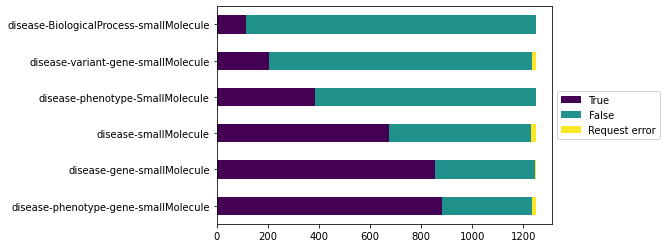

In [97]:
g = result.T.plot(kind='barh', stacked=True, colormap = "viridis")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('plot-summary.png', dpi=300, bbox_inches='tight')

### Veen Diagram

Example intersection 3 meta-paths 

In [90]:
dis_mol_li= set()
dis_gene_mol_li = set()
dis_phe_mol_li = set()


for mondo,chembl,a,b,c in zip(df_final["mondo id"], df_final["chembl id"],
    df_final["disease-smallMolecule"],df_final["disease-gene-smallMolecule"], df_final["disease-phenotype-gene-smallMolecule"]):
    if a == "True":
        dis_mol_li.add(f"{mondo,chembl}")
    if b == "True":
        dis_gene_mol_li.add(f"{mondo,chembl}")
    if c == "True":
        dis_phe_mol_li.add(f"{mondo,chembl}")

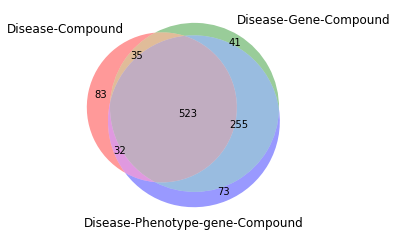

In [91]:
out = venn3([dis_mol_li, dis_gene_mol_li, dis_phe_mol_li], ( "Disease-Compound",'Disease-Gene-Compound', 'Disease-Phenotype-gene-Compound'))

### Intersection Upsetplot 

In [92]:
dis_mol_li= set()
dis_gene_mol_li = set()
dis_phe_mol_li = set()
dis_phe_gene_mol_li = set()
dis_var_mol_li = set()
dis_biopro_mol_li = set()


for mondo,chembl,a,b,c,d,e,f in zip(df_final["mondo id"], df_final["chembl id"],
                              df_final["disease-smallMolecule"],
                              df_final["disease-gene-smallMolecule"], 
                              df_final["disease-phenotype-SmallMolecule"],
                              df_final["disease-phenotype-gene-smallMolecule"],
                              df_final["disease-variant-gene-smallMolecule"],
                              df_final["disease-BiologicalProcess-smallMolecule"]):
    if a == "True":
        dis_mol_li.add(f"{mondo,chembl}")
    if b == "True":
        dis_gene_mol_li.add(f"{mondo,chembl}")
    if c == "True":
        dis_phe_mol_li.add(f"{mondo,chembl}")
    if d == "True":
        dis_phe_gene_mol_li.add(f"{mondo,chembl}")
    if e == "True":
        dis_var_mol_li.add(f"{mondo,chembl}")
    if f == "True":
        dis_biopro_mol_li.add(f"{mondo,chembl}")


In [93]:
test1 = from_contents({"Disease-Compound": dis_mol_li,
                      "Disease-Gene-Compound": dis_gene_mol_li, 
                       "Disease-Pheno-Compound": dis_phe_mol_li,
                      "Disease-Pheno-Gene-Compound": dis_phe_gene_mol_li, 
                       "Disease-variant-Compound": dis_var_mol_li,
                       "Disease-BiologicalProcess-Compound": dis_biopro_mol_li   
})
test1

id
Disease-Compound Disease-Gene-Compound Disease-Pheno-Compound Disease-Pheno-Gene-Compound Disease-variant-Compound Disease-BiologicalProcess-Compound                                    
True             False                 False                  True                        False                    False                               ('MONDO:0004976', 'CHEMBL1794791')
                 True                  False                  True                        False                    False                               ('MONDO:0004967', 'CHEMBL1200751')
                                       True                   True                        True                     True                                 ('MONDO:0011996', 'CHEMBL255863')
                 False                 False                  True                        False                    False                                ('MONDO:0010789', 'CHEMBL252556')
                                                              False                       False                    False                               ('MONDO:0009693', 'CHEMBL4297403')
...                                                                                                                                                                                   ...
False            False                 False                  True                        False                    False                               ('MONDO:0012579', 'CHEMBL4297322')
                                                                                                                   False                               ('MONDO:0000984', 'CHEMBL2311128')
                                                                                                                   False                               ('MONDO:0020121', 'CHEMBL1232111')
                                                                                                                   False                               ('MONDO:0012579', 'CHEMBL2109134')
                                                                                                                   False                                ('MONDO:0019471', 'CHEMBL550755')

[1045 rows x 1 columns]

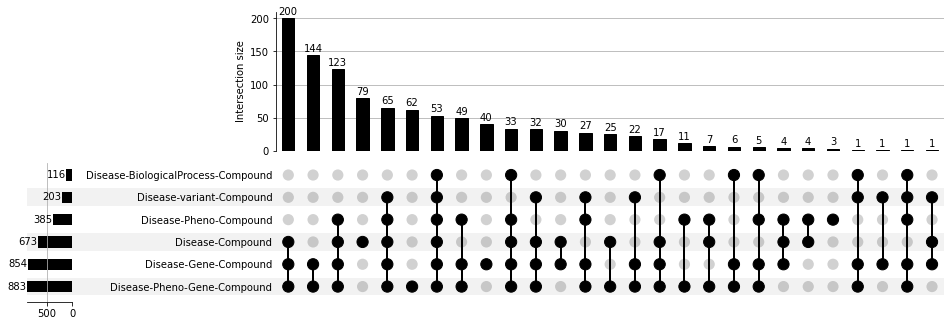

In [94]:
upsetplot.plot(test1, sort_by="cardinality", show_counts=True)
plt.savefig("plot.png",bbox_inches='tight',pad_inches=0, dpi = 300)